## データの取り込みと確認

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white") #グラフのプロパティを設定
plt.rcParams["figure.figsize"] = [10, 5] #グラフの大きさを設定
pd.set_option('display.max_columns', 150) #表示する列数の上限を150に設定
pd.set_option('display.max_rows', 50) #表示する行数の上限を50に設定

In [46]:
# データの取り込み
df_master = pd.read_csv("advertising_analysis_data.csv", parse_dates=True, index_col="date")
display(df_master.sort_index().head(20))
display(df_master.sort_index().tail(20))

# 2023-08-10以降の広告費データがないことに注意
# 2021年9月の段階で、productBはまだ存在していなかった様子

,productA_sales_amount,productB_sales_amount,productA_ad_cost,productB_ad_cost
date,,,,
2021-09-01,1927502,NaN,23441.907672,NaN
2021-09-02,1504470,NaN,15493.743139,NaN
2021-09-03,2335190,NaN,20552.312426,NaN
2021-09-04,2453752,NaN,19648.972397,NaN
2021-09-05,2705950,NaN,18834.571127,NaN
2021-09-06,2527534,NaN,19787.651347,NaN
2021-09-07,2263692,NaN,23754.371125,NaN
2021-09-08,2646010,NaN,27970.558881,NaN
2021-09-09,2114339,NaN,27112.562260,NaN


,productA_sales_amount,productB_sales_amount,productA_ad_cost,productB_ad_cost
date,,,,
2023-08-01,2049246,131760.0,24979.097464,25981.597036
2023-08-02,1967946,99090.0,23643.866522,23863.031057
2023-08-03,1761354,112080.0,26849.559270,30837.610781
2023-08-04,1784118,99200.0,19666.428332,26692.262709
2023-08-05,1981450,129880.0,32243.251313,25540.293265
2023-08-06,1840149,184880.0,28494.198973,26710.427325
2023-08-07,1372489,139930.0,33538.421873,25327.308633
2023-08-08,2126794,174030.0,35302.590253,24587.075621
2023-08-09,1592361,107720.0,27781.759488,25550.264423


infoメソッドやdescribeメソッドを使って、おかしなデータがないか確認する。

In [30]:
#データの欠損と型の確認(info)
df_master.info()

# productBのデータは欠損が含まれているため、販売開始前のデータの削除などが必要
# ad_costがない2023-08-10以降のデータの削除が必要

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2022-03-02 to 2021-09-24
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   productA_sales_amount  719 non-null    int64  
 1   productB_sales_amount  627 non-null    float64
 2   productA_ad_cost       708 non-null    float64
 3   productB_ad_cost       519 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.1 KB


In [31]:
#データ要約確認(describe)
display(df_master.describe()) #数値データ

#特におかしな点はなし

,productA_sales_amount,productB_sales_amount,productA_ad_cost,productB_ad_cost
count,7.190000e+02,627.000000,708.000000,519.000000
mean,2.343864e+06,85163.923445,33616.558932,15230.276722
std,6.928987e+05,71152.123551,13196.077829,12161.041701
min,7.000360e+05,5000.000000,12262.361659,0.000000
25%,1.867512e+06,29200.000000,25912.259989,3986.500000
50%,2.272697e+06,68400.000000,33539.552686,10429.264000
75%,2.753353e+06,123800.000000,39817.050760,24720.040282
max,5.291189e+06,676900.000000,144050.183923,50937.290199


## 課題0. データを"日"単位から"週"単位に変換してみましょう

In [32]:
#欠損を0で補完し、日付順に並び替え
df_week = df_master[:"2023-08-05"].fillna(0).sort_index()

#集計単位を"週""
df_week = df_week.resample("W").sum()
df_week

,productA_sales_amount,productB_sales_amount,productA_ad_cost,productB_ad_cost
date,,,,
2021-09-05,10926864,0.0,97971.506761,0.000000
2021-09-12,17589235,0.0,183192.094769,0.000000
2021-09-19,20781817,0.0,191938.143910,0.000000
2021-09-26,20558966,0.0,188632.747531,0.000000
2021-10-03,21064521,0.0,208946.035530,0.000000
...,...,...,...,...
2023-07-09,21325636,1227180.0,247862.272409,174727.431662
2023-07-16,16510745,1210950.0,217779.375201,142031.888091
2023-07-23,16171629,1041210.0,187925.309601,139343.290384


## 課題1. 売上と広告費の推移から分かることはあるか？

productA,Bそれぞれの売り上げと広告費の折れ線グラフを作成、分析する

In [33]:
#productAとproductBのデータフレームを分けておく
df_A = df_week[["productA_sales_amount", "productA_ad_cost"]]
df_B = df_week[["productB_sales_amount", "productB_ad_cost"]]
display(df_A)
display(df_B)

,productA_sales_amount,productA_ad_cost
date,,
2021-09-05,10926864,97971.506761
2021-09-12,17589235,183192.094769
2021-09-19,20781817,191938.143910
2021-09-26,20558966,188632.747531
2021-10-03,21064521,208946.035530
...,...,...
2023-07-09,21325636,247862.272409
2023-07-16,16510745,217779.375201
2023-07-23,16171629,187925.309601


,productB_sales_amount,productB_ad_cost
date,,
2021-09-05,0.0,0.000000
2021-09-12,0.0,0.000000
2021-09-19,0.0,0.000000
2021-09-26,0.0,0.000000
2021-10-03,0.0,0.000000
...,...,...
2023-07-09,1227180.0,174727.431662
2023-07-16,1210950.0,142031.888091
2023-07-23,1041210.0,139343.290384


<Axes: xlabel='date', ylabel='productA_ad_cost'>

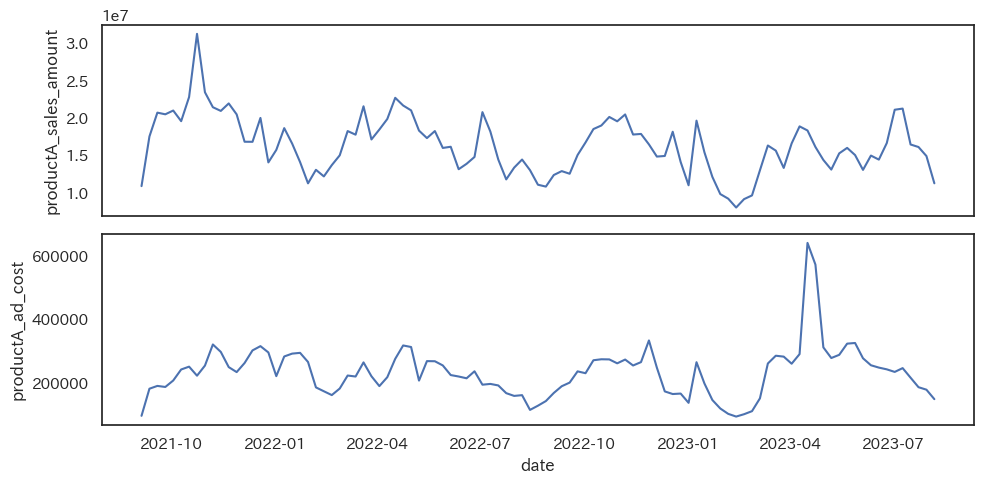

In [34]:
#productA
fig, axes = plt.subplots(2, 1, tight_layout=True, sharex="all")
sns.lineplot(x=df_A.index, y=df_A["productA_sales_amount"], ax=axes[0])
sns.lineplot(x=df_A.index, y=df_A["productA_ad_cost"], ax=axes[1])

# 全く別々の動きをしているわけではないが、広告費を増やしたのに売上が上がっていないこともある

<Axes: xlabel='date', ylabel='productB_ad_cost'>

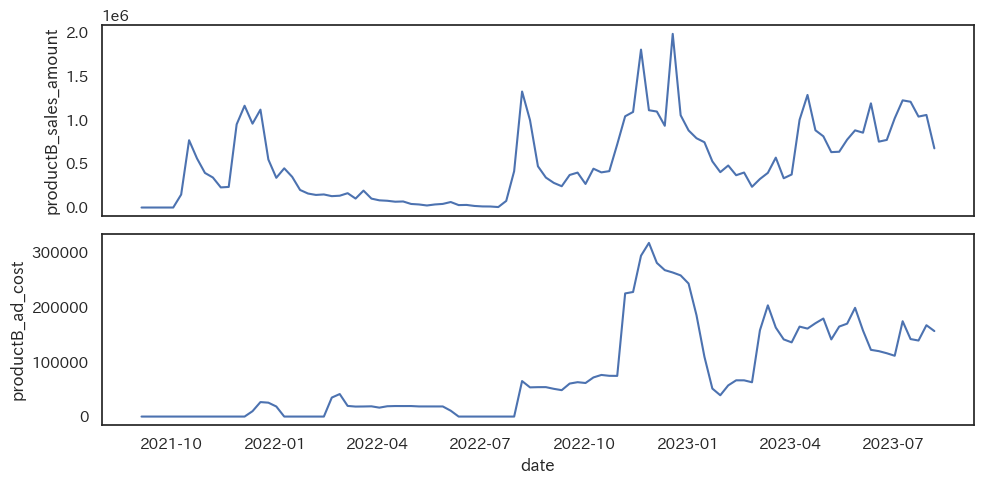

In [35]:
#productB
fig, axes = plt.subplots(2, 1, tight_layout=True, sharex="all")
sns.lineplot(x=df_B.index, y=df_B["productB_sales_amount"], ax=axes[0])
sns.lineplot(x=df_B.index, y=df_B["productB_ad_cost"], ax=axes[1])

# 2022年7月までは対して広告費をかけてなさそうなので、分析データを2022年8月以降に絞った方がよさそう

            productB_sales_amount  productB_ad_cost
date                                               
2022-08-07              1328300.0      65074.000000
2022-08-14              1000100.0      53515.000000
2022-08-21               472300.0      53902.000000
2022-08-28               343200.0      53946.000000
2022-09-04               282200.0      50846.000000
...                           ...               ...
2023-07-09              1227180.0     174727.431662
2023-07-16              1210950.0     142031.888091
2023-07-23              1041210.0     139343.290384
2023-07-30              1059920.0     167407.346049
2023-08-06               677600.0     156707.295748

[53 rows x 2 columns]


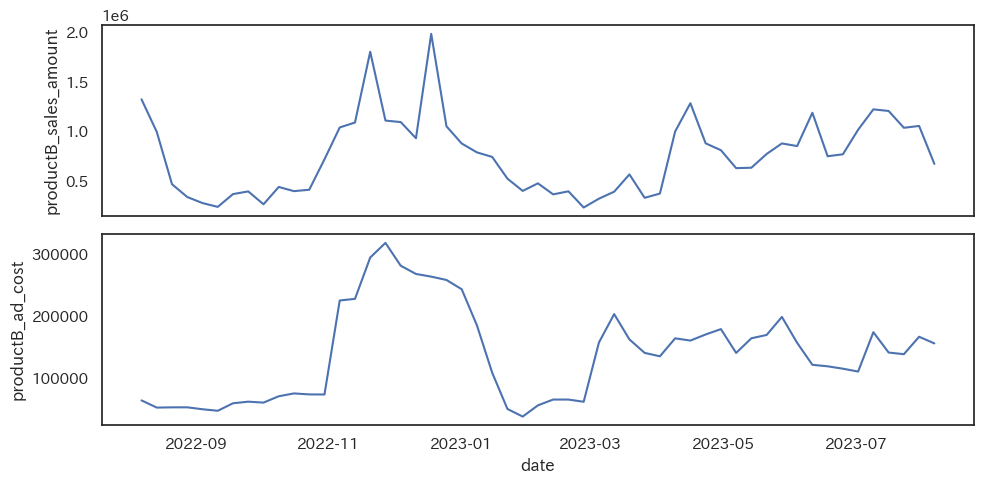

In [36]:
#2022年8月以降のみのデータに絞り、再度productBのグラフを作成
df_B = df_B["2022-08-01":]
fig, axes = plt.subplots(2, 1, tight_layout=True, sharex="all")
sns.lineplot(x=df_B.index, y=df_B["productB_sales_amount"], ax=axes[0])
sns.lineplot(x=df_B.index, y=df_B["productB_ad_cost"], ax=axes[1])
print(df_B)

# 少しだが広告費と売上が連動している印象がある

### 【結論】
商品A,Bどちらも広告が上がると売上が上がる傾向がわずかにみられる

## 課題2. 広告の即時効果はあるか？

①広告費と売上の相関を検証→散布図の作成と、相関係数を算出  
②ROASの算出→単回帰分析を使って回帰係数から算出(sklearnでも可能だが、statsmodelsがおすすめ)

productA: SignificanceResult(statistic=0.5012580081537565, pvalue=9.34036418096036e-08)
productB: SignificanceResult(statistic=0.6254636348975972, pvalue=5.519286677963984e-07)


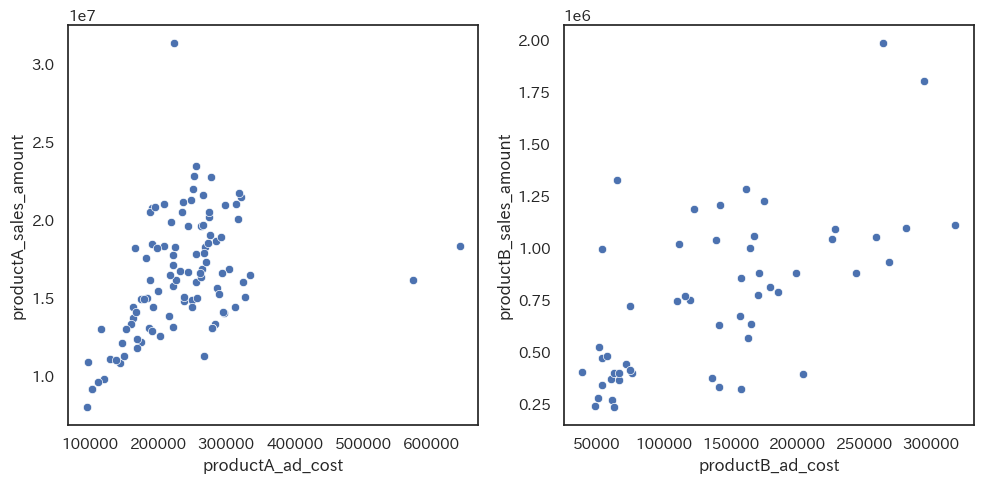

In [37]:
# 相関分析
from scipy import stats

fig, axes = plt.subplots(1, 2, tight_layout=True)
sns.scatterplot(x="productA_ad_cost", y="productA_sales_amount", data=df_A, ax=axes[0])
sns.scatterplot(x="productB_ad_cost", y="productB_sales_amount", data=df_B, ax=axes[1])
print("productA:", stats.spearmanr(df_A["productA_ad_cost"], df_A["productA_sales_amount"]))
print("productB:", stats.spearmanr(df_B["productB_ad_cost"], df_B["productB_sales_amount"]))

#productA,Bどちらも同じ週の広告費と売上に中等度の相関がある。相関係数はBの方がやや高い。(相関の高さと効果の高さは別物なので注意)

In [38]:
# 単回帰分析(productA)
import statsmodels.api as sm

X = df_A["productA_ad_cost"]
y = df_A["productA_sales_amount"]
model=sm.OLS(y, X)
result = model.fit()
result.summary()

#回帰係数は65であり、ROASは6500%(1円の広告費に対して65円の売上)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     productA_sales_amount   R-squared (uncentered):                   0.908
Model:                               OLS   Adj. R-squared (uncentered):              0.907
Method:                    Least Squares   F-statistic:                              988.1
Date:                   Sun, 26 Nov 2023   Prob (F-statistic):                    1.23e-53
Time:                           22:09:35   Log-Likelihood:                         -1703.4
No. Observations:                    101   AIC:                                      3409.
Df Residuals:                        100   BIC:                                      3411.
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
productA_ad_cost    64.9107      2.065     31.433      0.000      60.814      69.008
==============================================================================
Omnibus:                       58.912   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.991
Skew:                          -1.780   Prob(JB):                     7.40e-76
Kurtosis:                      11.339   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#単回帰分析(productB)
import statsmodels.api as sm

X = df_B["productB_ad_cost"]
y = df_B["productB_sales_amount"]
model=sm.OLS(y, X)
result = model.fit()
result.summary()

#回帰係数は5であり、ROASは500%(1円の広告費に対して5円の売上)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     productB_sales_amount   R-squared (uncentered):                   0.856
Model:                               OLS   Adj. R-squared (uncentered):              0.853
Method:                    Least Squares   F-statistic:                              309.1
Date:                   Sun, 26 Nov 2023   Prob (F-statistic):                    1.55e-23
Time:                           22:09:35   Log-Likelihood:                         -747.80
No. Observations:                     53   AIC:                                      1498.
Df Residuals:                         52   BIC:                                      1500.
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
productB_ad_cost     5.0119      0.285     17.582      0.000       4.440       5.584
==============================================================================
Omnibus:                        2.854   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                1.926
Skew:                           0.413   Prob(JB):                        0.382
Kurtosis:                       3.434   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 【結論】
広告の即時効果(同じ週に現れる効果)としては以下のことがわかった
- productA,Bどちらも売上と広告費に中等度の相関がある(広告は売上に影響している)
- productAの広告のROASは6500%と高め
- productBの広告のROASは500%といまいち
- productBは価格が高いため、広告を見てから購買行動に至るまで時間がかかっている可能性がある

## 課題3. 広告の翌週以降への効果はあるか？

In [40]:
#定常性の確認(ADF検定)
from statsmodels.tsa.stattools import adfuller

for i in range(len(df_A.columns)):
    c_results = adfuller(df_A.iloc[:, i], regression="c")
    print(df_A.columns[i], c_results[1])
for i in range(len(df_B.columns)):
    c_results = adfuller(df_B.iloc[:, i], regression="c")
    print(df_B.columns[i], c_results[1])

# どれも0.05以下なため、定常性は確保されていると判断する(確保されていない場合は前週値との差分を使ったりする必要がある)

productA_sales_amount 0.002030191787788228
productA_ad_cost 0.00874893408885777
productB_sales_amount 0.012174731402825458
productB_ad_cost 0.011563512499524411


In [44]:
#VAR+グレンジャー因果性検定(productA)
from statsmodels.tsa.vector_ar.var_model import VAR

#VAR
df = df_A[["productA_sales_amount", "productA_ad_cost"]]
maxlags = 5
var_model = VAR(df)
lag = var_model.select_order(maxlags).selected_orders
print("selectラグ", lag["aic"])
results = var_model.fit(lag["aic"])
print(results.summary())

# グレンジャー因果性検定
test_results = results.test_causality(causing=1, caused=0)
print("グレンジャー因果性検定：", df.columns[1], "->", df.columns[0], test_results.pvalue)

#productAの広告の翌週以降の効果はなさそう

selectラグ 3
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Nov, 2023
Time:                     22:14:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    51.6594
Nobs:                     98.0000    HQIC:                   51.4395
Log likelihood:          -2777.33    FPE:                1.88469e+22
AIC:                      51.2901    Det(Omega_mle):     1.64178e+22
--------------------------------------------------------------------
Results for equation productA_sales_amount
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                      3910421.730418   1395653.352873            2.802           0.005
L1.productA_sales_amount         0.784879         0.107554            7.298      

In [45]:
#VAR+グレンジャー因果性検定(productB)

#VAR
df = df_B[["productB_sales_amount", "productB_ad_cost"]]
maxlags = 5
var_model = VAR(df)
lag = var_model.select_order(maxlags).selected_orders
print("selectラグ", lag["aic"])
results = var_model.fit(lag["aic"])
print(results.summary())

# グレンジャー因果性検定
test_results = results.test_causality(causing=1, caused=0)
print("グレンジャー因果性検定：", df.columns[1], "->", df.columns[0], test_results.pvalue)

#グレンジャー因果性検定のp値が0.05を下回っているため、productBの広告の翌週以降の効果はありそう
#VARの係数をみると、前週の広告費の係数が1.84であるため、ROASは約200%。

selectラグ 1
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Nov, 2023
Time:                     22:15:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    46.2212
Nobs:                     52.0000    HQIC:                   46.0823
Log likelihood:          -1337.47    FPE:                9.46091e+19
AIC:                      45.9960    Det(Omega_mle):     8.45696e+19
--------------------------------------------------------------------
Results for equation productB_sales_amount
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                       172666.321078     88544.927049            1.950           0.051
L1.productB_sales_amount         0.423263         0.127941            3.308      

## 分析の結論

-  productAは広告をうった週のみに即時効果があり、ROASは約6500%。継続効果はなし。
-  productBは広告をうった即時効果としてはROASで500%程度だが、翌週に継続効果として+200%加算される。合計でROAS700%程度の効果がある。
-  どちらの商品も広告効果があることがわかったが、ROASの面ではproductBの広告は改善の余地がある。